## <font color='blue'> DSIR-1116-Ames Regression Challenge </font>

### <font color='black'> Goal: Predict Sales Price for each house for every ID the model should predict the value of the sale price.</font>

### <font color='blue'> Import Python libraries </font>

In [1]:
### Standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report,
                            plot_confusion_matrix,
                            mean_squared_error,
                            r2_score)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

### <font color='blue'>Import data files.</font>

In [2]:
df_sample = pd.read_csv("./datasets/sample_sub_reg.csv")
df_test = pd.read_csv("./datasets/test.csv")
df_train = pd.read_csv("./datasets/train.csv")

### <font color='blue'> EDA- Train Data Set </font>

In [3]:
# look at the head records
df_train.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [4]:
# find out the columns that have a NaN in them
df_train.isna().sum().nlargest(31)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Finish      114
Garage Qual        114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Qual           55
Bsmt Cond           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Garage Cars          1
Garage Area          1
Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Area             0
dtype: int64

In [5]:
# look at data types of training data
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2051,NaN,NaN,NaN,1474.03,843.981,1,753.5,1486,2198,2930
PID,2051,NaN,NaN,NaN,7.1359e+08,1.88692e+08,5.26301e+08,5.28458e+08,5.35453e+08,9.0718e+08,9.24152e+08
MS SubClass,2051,NaN,NaN,NaN,57.0088,42.8242,20,20,50,70,190
MS Zoning,2051,7,RL,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Frontage,1721,NaN,NaN,NaN,69.0552,23.2607,21,58,68,80,313
...,...,...,...,...,...,...,...,...,...,...,...
Misc Val,2051,NaN,NaN,NaN,51.5744,573.394,0,0,0,0,17000
Mo Sold,2051,NaN,NaN,NaN,6.21989,2.74474,1,4,6,8,12
Yr Sold,2051,NaN,NaN,NaN,2007.78,1.31201,2006,2007,2008,2009,2010
Sale Type,2051,9,WD,1781,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# look at all columns that have null and remove that have more than 5%
(df_train.isna().sum()/(df_train.count()+df_train.isna().sum())).nlargest(10)

Pool QC          0.995612
Misc Feature     0.968308
Alley            0.931741
Fence            0.804973
Fireplace Qu     0.487567
Lot Frontage     0.160897
Garage Yr Blt    0.055583
Garage Finish    0.055583
Garage Qual      0.055583
Garage Cond      0.055583
dtype: float64

#### <font color='blue'> addressing NaN columns </font>

In [7]:
# identify all int and float columns that have a NULL value 
null_cols = list(df_train.isna().sum().nlargest(20).index)

In [8]:
# NUll columns that are needed in model
keep_null_cols = ['Total Bsmt SF' , 'Garage Cars' , 'Garage Area' ,'Garage Cond' , 'Garage Type' , 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF']
# NULL columns that can be dropped 
remove_null_cols = [x for x in null_cols if x not in keep_null_cols]


In [9]:
# drop unnecessary NULL columns
df_train.drop(columns=remove_null_cols,inplace= True)

In [10]:
# fill nulls with 0 - only for the keep_null_cols
df_train[keep_null_cols] = df_train[keep_null_cols].fillna(value=0)

#### below numeric columns have NaN in them. Lets replace NaN with 0

| Column.        | NaN |
|----------------|-----|
| Lot Frontage   | 330 |
| Garage Yr Blt  | 114 |
| Mas Vnr Area   | 22  |
| Bsmt Half Bath | 2   |
| Bsmt Full Bath | 2   |
| BsmtFin SF 1   | 2   |
| Garage Cars    | 1   |
| Garage Area    | 1   |
| Total Bsmt SF  | 1   |
| Bsmt Unf SF    | 1   |
| BsmtFin SF 2   | 1   |

In [11]:
# # using the above replace all numeric columns which have a NaN with a 0

# df_train[['Lot Frontage','Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Half Bath' 
#           ,'BsmtFin SF 1' ,'Garage Cars','Garage Area', 'Total Bsmt SF',
#           'Bsmt Unf SF','BsmtFin SF 2', 'Bsmt Full Bath']] = 
# df_train[['Lot Frontage','Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Half Bath'
#           ,'BsmtFin SF 1' ,'Garage Cars',
# 'Garage Area', 'Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','Bsmt Full Bath']].fillna(0)

In [12]:
# identify all string columns that have a NULL value 
df_train.select_dtypes(include= ['object']).isna().sum().nlargest(115)

MS Zoning       0
Exterior 2nd    0
Paved Drive     0
Garage Cond     0
Garage Type     0
Functional      0
Kitchen Qual    0
Electrical      0
Central Air     0
Heating QC      0
Heating         0
Foundation      0
Exter Cond      0
Exter Qual      0
Exterior 1st    0
Street          0
Roof Matl       0
Roof Style      0
House Style     0
Bldg Type       0
Condition 2     0
Condition 1     0
Neighborhood    0
Land Slope      0
Lot Config      0
Utilities       0
Land Contour    0
Lot Shape       0
Sale Type       0
dtype: int64

In [13]:
# # drop columns that have a high value of NaN columns 
# df_train.drop(columns = ['Pool QC' , 'Misc Feature', 'Alley', 'Fence' , 'Fireplace Qu' ], inplace = True)

In [14]:
# lets keep for reference all the column names
print(df_train.columns.tolist())

['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type', 'Garage Cars', 'Garage Area', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type', 'SalePrice']


### <font color='blue'> Lets do a heatmap to undestand what variables will have a correlation with SalePrice </font>

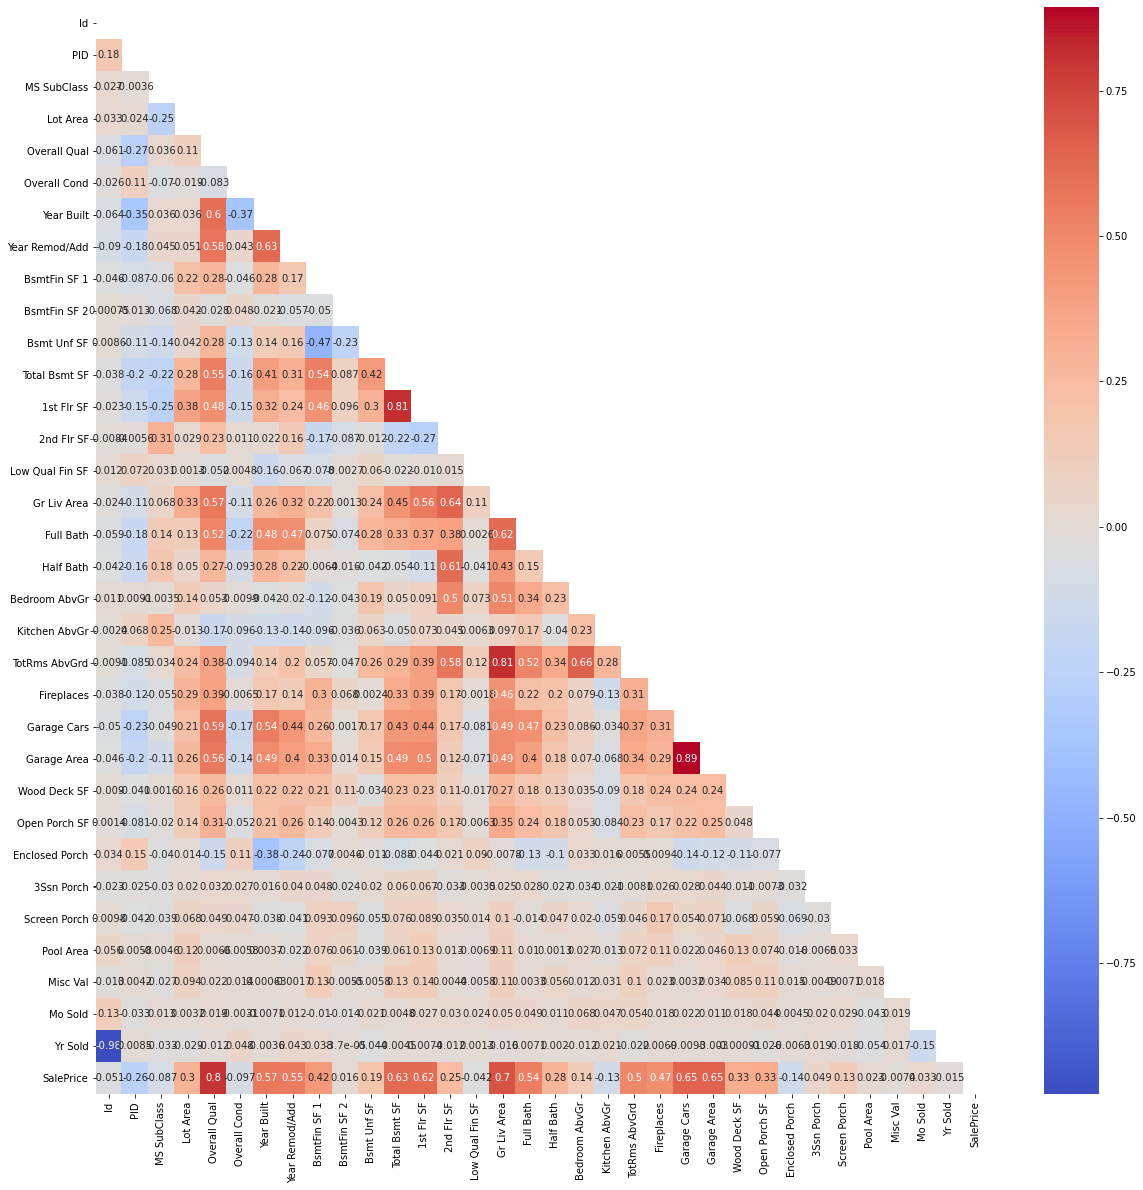

In [15]:
mask = np.zeros_like(df_train.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20, 20))
sns.heatmap(
    df_train.corr(),
    cmap='coolwarm',
    annot=True,
    mask = mask
);

#### <font color='blue'> Sale Price has high Correlation ship with below metrics :</font>
#### <font color='blue'> Overall Qual </font>
#### <font color='blue'> Gr Liv Area </font>
#### <font color='blue'> Garage Cars </font>
#### <font color='blue'> Garage Area </font>
#### <font color='blue'> Lot Frontage </font>
#### <font color='blue'> Lot Area </font>
#### <font color='blue'> Year Built </font>
#### <font color='blue'> Year Remod/Add </font>
#### <font color='blue'> Mas Vnr Area </font>
#### <font color='blue'> BsmtFin SF 1 </font>
#### <font color='blue'> Total Bsmt SF </font>
#### <font color='blue'> 1st Flr SF </font>
#### <font color='blue'> 2nd Flr SF </font>
#### <font color='blue'> Gr Liv Area </font>
#### <font color='blue'> Full Bath </font>
#### <font color='blue'> TotRms AbvGrd </font>




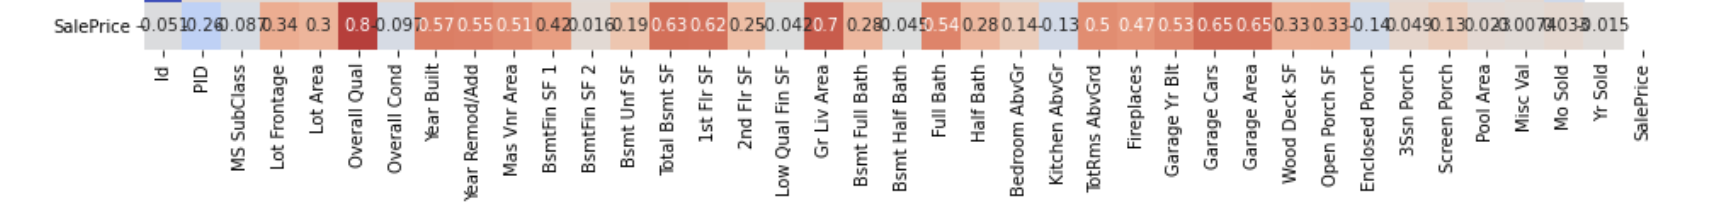

#### <font color='blue'> Lets do at distribution of SalePrice with few important parameters </font>

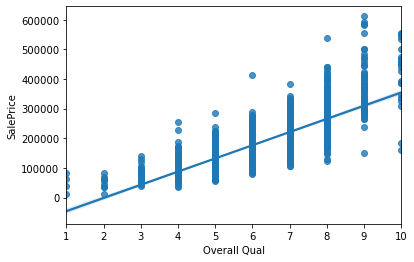

In [16]:
sns.regplot(x="Overall Qual", y="SalePrice", data=df_train);

#### <font color='blue'> Observation: The Sale Price has a weak linear relationship with Lot Area. Also there are </font>
#### <font color='blue'> out liers that need to be removed. </font>

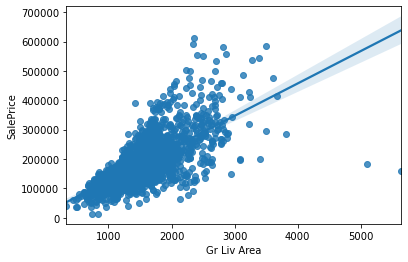

In [17]:
sns.regplot(x="Gr Liv Area", y="SalePrice", data=df_train);

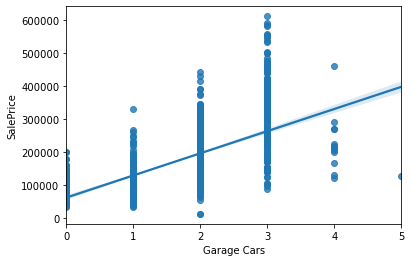

In [18]:
sns.regplot(x="Garage Cars", y="SalePrice", data=df_train);

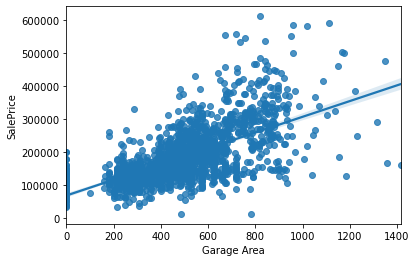

In [19]:
sns.regplot(x="Garage Area", y="SalePrice", data=df_train);

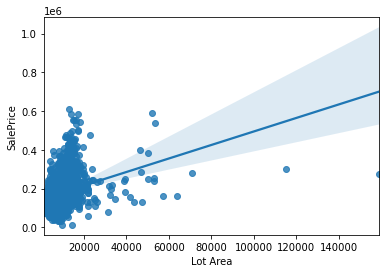

In [20]:
sns.regplot(x="Lot Area", y="SalePrice", data=df_train);

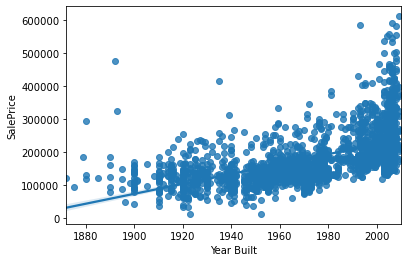

In [21]:
sns.regplot(x="Year Built", y="SalePrice", data=df_train);

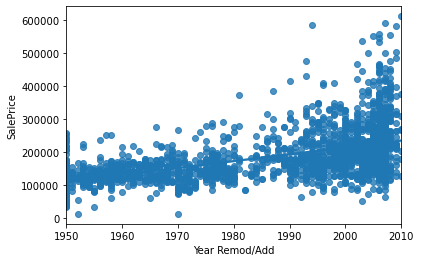

In [22]:
sns.regplot(x="Year Remod/Add", y="SalePrice", data=df_train);

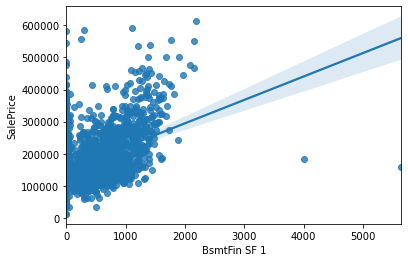

In [23]:
sns.regplot(x="BsmtFin SF 1", y="SalePrice", data=df_train);

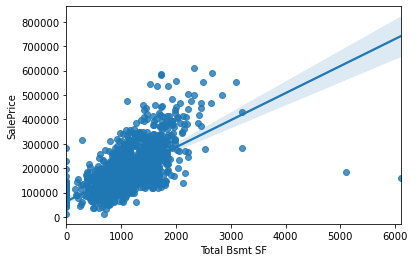

In [24]:
sns.regplot(x="Total Bsmt SF", y="SalePrice", data=df_train);

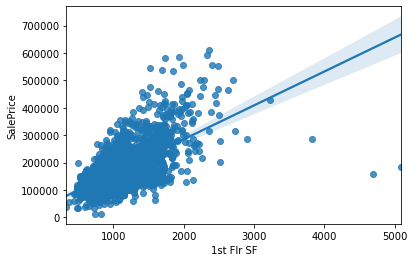

In [25]:
sns.regplot(x="1st Flr SF", y="SalePrice", data=df_train);

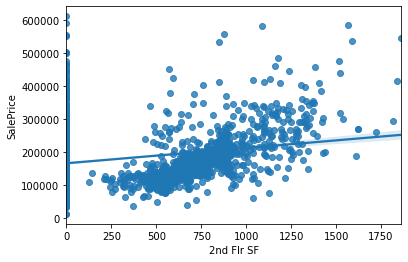

In [26]:
sns.regplot(x="2nd Flr SF", y="SalePrice", data=df_train);

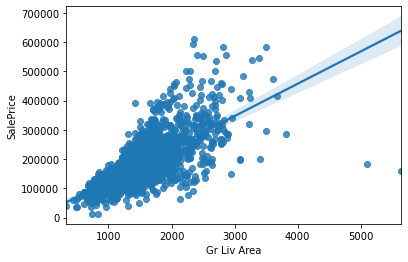

In [27]:
sns.regplot(x="Gr Liv Area", y="SalePrice", data=df_train);

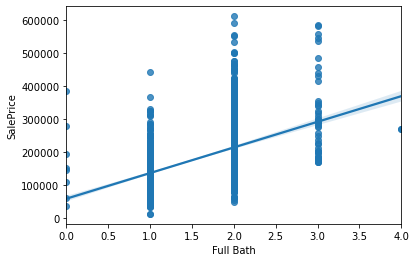

In [28]:
sns.regplot(x="Full Bath", y="SalePrice", data=df_train);

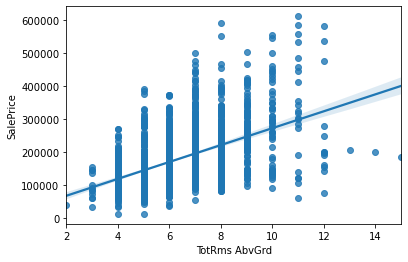

In [29]:
sns.regplot(x="TotRms AbvGrd", y="SalePrice", data=df_train);

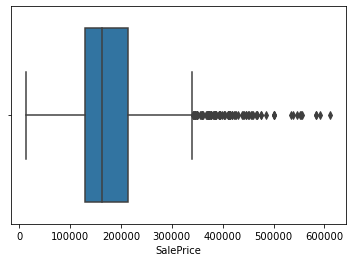

In [30]:
sns.boxplot(x=df_train["SalePrice"]);

#### <font color='blue'> from above observations it is clear that the SalePrice outliers need to be cleaned to get a real picture of data. Lets remove the outliers and rerun the above plots. </font>

In [31]:
# remove SalePrice outliers
df_train= df_train[df_train['SalePrice'] <= 310500]

In [32]:
df_train= df_train[df_train['SalePrice'] > 40500]

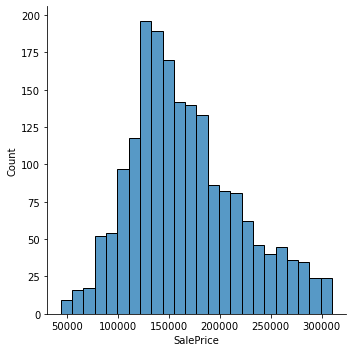

In [33]:
sns.displot(df_train, x="SalePrice");

## <font color='blue'> Analysing Numeric Data. </font>

### <font color='blue'> Forward Step Wise (FSW) to select the best predictors. </font>

#### <font color='blue'> Add predictors to the model and see where best R2 score is. </font>

#### <font color='blue'> FSW Step 0 : Setup initial data sets </font>

In [34]:
# define a data frame that will store the score of all models
results = pd.DataFrame(columns=['feature','score'])

In [35]:
# create a list of all features for the training data set ( integers or float only )
features_list = list(df_train.select_dtypes(include= ['int64' ,'float64'] ))
features_list.remove('SalePrice')

#### <font color='blue'> FSW Step 1 : Create a NULL model </font>

In [36]:
## create the target train data frame
y_train=df_train['SalePrice']

In [37]:
## make NULL prediction
y_pred_null = np.full_like(y_train, y_train.mean())

In [38]:
## add NULL R2 score to result data set. This will be the first record in
results.loc[0] =  ['Null' , r2_score(y_train,y_pred_null)]

In [39]:
# X_train.loc["BsmtFin SF 1"] = X_train["BsmtFin SF 1"].fillna(value=0)

#### <font color='blue'> FSW Step 4 : Calculate the R2 with this predictor </font>

In [40]:
# create an empty model feature list. We will keep adding to this list
model_features = [] 
i = 1 # make this 1 as we have already uploaded the result for NULL
# looping to create scores for all scores
for feat in features_list:
    # appending features to 
    model_features.append(feat)
    # define X 
    X_train=df_train[model_features]
    # step 1 Initiate LR
    lr = LinearRegression()
    # fit the model
    modelx = lr.fit(X_train,y_train)
    # calculate the accuracy w.r.t traning data
    results.loc[i] = [model_features, modelx.score(X_train, y_train)]
    i+=1

In [41]:
results['score'].round(9)

0    -0.000000
1     0.001144
2     0.037452
3     0.041132
4     0.110807
5     0.639624
6     0.639847
7     0.684594
8     0.691882
9     0.708718
10    0.710612
11    0.716056
12    0.716056
13    0.727985
14    0.792635
15    0.792945
16    0.792945
17    0.794902
18    0.795166
19    0.796425
20    0.797609
21    0.798085
22    0.806550
23    0.815411
24    0.815413
25    0.815820
26    0.816043
27    0.816358
28    0.816571
29    0.820709
30    0.822189
31    0.828524
32    0.828660
33    0.828775
Name: score, dtype: float64

#### <font color='blue'> Observation: Adding all the 38 numeric predictors helps to increase the accuracy. </font>

In [42]:
features_list

['Id',
 'PID',
 'MS SubClass',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

#### <font color='blue'> Lets try to funnel on which of the numeric metric could have a bigger correlation </font>

In [43]:
df_train.dtypes

Id              int64
PID             int64
MS SubClass     int64
MS Zoning      object
Lot Area        int64
                ...  
Misc Val        int64
Mo Sold         int64
Yr Sold         int64
Sale Type      object
SalePrice       int64
Length: 63, dtype: object

### <font color='blue'>Addressing outliers for above features  </font>

#### <font color='blue'>Lot Frontage  </font>

#### <font color='blue'>'Lot Area'  </font>

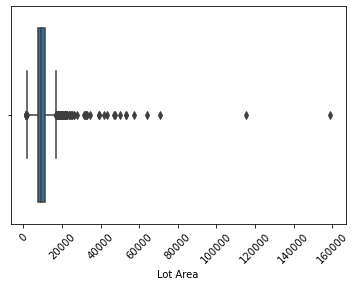

In [44]:
# lot Frontage
ax = sns.boxplot(x=df_train['Lot Area'] )
plt.xticks(rotation=45)
l = plt.xlabel('Lot Area')

In [45]:
# df_train['Lot Area'].nlargest(20)
# ## lets remove records where the Lot Frontage is more than 140

df_train = df_train[df_train['Lot Area'] < 18000]

#### <font color='blue'>'Overall Qual'  </font>

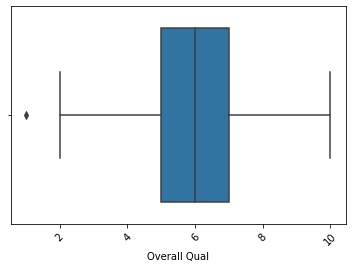

In [46]:
# lot Frontage
ax = sns.boxplot(x=df_train['Overall Qual'] )
plt.xticks(rotation=45)
l = plt.xlabel('Overall Qual')

In [47]:
df_train['Overall Qual'].nsmallest(10)

1372    1
114     2
249     2
432     2
1089    2
2017    2
103     3
258     3
260     3
356     3
Name: Overall Qual, dtype: int64

In [48]:
df_train = df_train[df_train['Overall Qual'] > 2]

#### <font color='blue'> SalePrice </font>

### <font color='blue'> Analyzing Non Numeric data </font>

In [49]:
df_train.select_dtypes(include = ['object']  )

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Cond,Paved Drive,Sale Type
0,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,...,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,TA,Y,WD
1,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,...,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,TA,Y,WD
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,GasA,TA,Y,SBrkr,Gd,Typ,Detchd,TA,Y,WD
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,...,GasA,Gd,Y,SBrkr,TA,Typ,BuiltIn,TA,Y,WD
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,...,GasA,TA,Y,SBrkr,TA,Typ,Detchd,TA,N,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,...,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,TA,Y,WD
2047,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,GasA,Ex,Y,SBrkr,TA,Typ,Detchd,TA,Y,WD
2048,RL,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,GasA,Gd,Y,SBrkr,TA,Typ,Detchd,Fa,Y,WD
2049,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,GasA,TA,Y,SBrkr,TA,Typ,Attchd,TA,Y,WD


In [50]:
# df = pd.concat([df_train, pd.get_dummies(df_train.select_dtypes(include = ['object']  ))], axis=1)

In [51]:
df = pd.concat([df_train['SalePrice'], pd.get_dummies(df_train.select_dtypes(include = ['object']))], axis=1)

In [52]:
# define a data frame that will store the score of all models
results_o = pd.DataFrame(columns=['feature','score'])
# create a list of all features for the training data set ( integers or float only )
features_list_o = list(df.select_dtypes(include= ['uint8' , 'int64' ] ))
features_list_o.remove('SalePrice')

## create the target train data frame
y_train_o=df['SalePrice']

## make NULL prediction
y_pred_null_o = np.full_like(y_train_o, y_train_o.mean())

## add NULL R2 score to result data set. This will be the first record in
results_o.loc[0] =  ['Null' , r2_score(y_train_o,y_pred_null_o)]

# create an empty model feature list. We will keep adding to this list
model_features_o = [] 
i = 1 # make this 1 as we have already uploaded the result for NULL
# looping to create scores for all scores
for feat_o in features_list_o:
    # appending features to 
    model_features_o.append(feat_o)
    # define X 
    X_train_o=df[model_features_o]
    # step 1 Initiate LR
    lr_o = LinearRegression()
    # fit the model
    modelx_o = lr_o.fit(X_train_o,y_train_o)
    # calculate the accuracy w.r.t traning data
    results_o.loc[i] = [model_features_o, modelx_o.score(X_train_o, y_train_o)]
    i+=1

In [53]:
results_o.score.nlargest(10)

188    0.780358
186    0.780186
189    0.779974
185    0.779846
183    0.779626
184    0.779605
187    0.779358
181    0.779176
180    0.779029
182    0.778959
Name: score, dtype: float64

#### <font color='blue'> Observation: We will evaluate if adding top 10 non numeric predictors helps to increase the accuracy. </font>

In [54]:
results_o.loc[197:211]

,feature,score


In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1822.0,165208.200878,53022.381831,44000.0,128000.0,155417.5,195475.0,310090.0
MS Zoning_C (all),1822.0,0.008782,0.093323,0.0,0.0,0.0,0.0,1.0
MS Zoning_FV,1822.0,0.052141,0.222371,0.0,0.0,0.0,0.0,1.0
MS Zoning_RH,1822.0,0.007684,0.087344,0.0,0.0,0.0,0.0,1.0
MS Zoning_RL,1822.0,0.764544,0.424400,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
Sale Type_ConLI,1822.0,0.002744,0.052328,0.0,0.0,0.0,0.0,1.0
Sale Type_ConLw,1822.0,0.002195,0.046816,0.0,0.0,0.0,0.0,1.0
Sale Type_New,1822.0,0.057080,0.232059,0.0,0.0,0.0,0.0,1.0
Sale Type_Oth,1822.0,0.002195,0.046816,0.0,0.0,0.0,0.0,1.0


In [56]:
df_train.select_dtypes(include = ['object']).columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Electrical',
       'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Cond',
       'Paved Drive', 'Sale Type'],
      dtype='object')

In [57]:
df_train.select_dtypes(include = ['object'])

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Cond,Paved Drive,Sale Type
0,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,...,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,TA,Y,WD
1,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,...,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,TA,Y,WD
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,GasA,TA,Y,SBrkr,Gd,Typ,Detchd,TA,Y,WD
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,...,GasA,Gd,Y,SBrkr,TA,Typ,BuiltIn,TA,Y,WD
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,...,GasA,TA,Y,SBrkr,TA,Typ,Detchd,TA,N,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,...,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,TA,Y,WD
2047,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,GasA,Ex,Y,SBrkr,TA,Typ,Detchd,TA,Y,WD
2048,RL,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,GasA,Gd,Y,SBrkr,TA,Typ,Detchd,Fa,Y,WD
2049,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,GasA,TA,Y,SBrkr,TA,Typ,Attchd,TA,Y,WD


In [58]:
print(df.columns.tolist())

['SalePrice', 'MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Street_Grvl', 'Street_Pave', 'Lot Shape_IR1', 'Lot Shape_IR2', 'Lot Shape_IR3', 'Lot Shape_Reg', 'Land Contour_Bnk', 'Land Contour_HLS', 'Land Contour_Low', 'Land Contour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'Lot Config_Corner', 'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside', 'Land Slope_Gtl', 'Land Slope_Mod', 'Land Slope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighbor

In [59]:
df = pd.concat([df_train, pd.get_dummies(df_train.select_dtypes(include = ['object']  ))], axis=1)

### <font color='blue'>Building the Model </font>

In [60]:
feat = [ 'MS Zoning_C (all)', 'MS Zoning_FV',  'MS Zoning_RH', 
        'MS Zoning_RL', 'MS Zoning_RM',
        'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 
        'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
        'Neighborhood_Gilbert', 'Neighborhood_Greens',  'Neighborhood_IDOTRR', 
         'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
        'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 
        'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW'  ,
        'Bldg Type_1Fam', 'Bldg Type_2fmCon', 'Bldg Type_Duplex', 'Bldg Type_Twnhs', 'Bldg Type_TwnhsE',
        'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 
          'Functional_Typ','Sale Type_COD', 'Sale Type_CWD', 'Sale Type_Con', 
        'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD ',
        'Bldg Type_1Fam', 'Bldg Type_2fmCon', 'Bldg Type_Duplex', 'Bldg Type_Twnhs', 'Bldg Type_TwnhsE',
        'House Style_1.5Fin', 'House Style_1.5Unf', 'House Style_1Story', 'House Style_2.5Fin',
        'House Style_2.5Unf', 
        'House Style_2Story', 'House Style_SFoyer', 'House Style_SLvl',
          'Lot Area','Overall Qual','Year Built','Year Remod/Add',
        'Total Bsmt SF','1st Flr SF','Gr Liv Area','Full Bath','TotRms AbvGrd',
        'Garage Cars', 'Garage Area']
X= df[feat]
y=df['SalePrice']


In [61]:
# verifying the shape of data sets
X.shape, y.shape

((1822, 71), (1822,))

In [62]:
# divide our data set into Train and Test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 2020)

In [63]:
# intiate the model
lr = LinearRegression()

In [64]:
# fit the model to the training data
model = lr.fit(X_train , y_train)

In [65]:
# make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [66]:
# checking model score
print (f"Score Accuracy Train: {round(model.score(X_train, y_train),4)*100}")

Score Accuracy Train: 87.98


In [67]:
print (f"Score Accuracy Test: {round(model.score(X_test, y_test),4)*100}")

Score Accuracy Test: 87.92


### <font color='blue'>Running the model on test data provided </font>

In [68]:
df_test_main = df_test

In [69]:
df_test.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [70]:
df_test_p = pd.concat([df_test, pd.get_dummies(df_test.select_dtypes(include = ['object']))], axis=1)

In [71]:
# df_test_all_cols = df_test.columns
# df_test_drop_cols = [x for x in df_test_all_cols if x not in df_test_keep_cols]

feat_test = [ 'MS Zoning_C (all)', 'MS Zoning_FV',  'MS Zoning_RH', 
        'MS Zoning_RL', 'MS Zoning_RM',
        'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 
        'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
        'Neighborhood_Gilbert', 'Neighborhood_Greens',  'Neighborhood_IDOTRR', 
         'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
        'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 
        'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW'  ,
        'Bldg Type_1Fam', 'Bldg Type_2fmCon', 'Bldg Type_Duplex', 'Bldg Type_Twnhs', 'Bldg Type_TwnhsE',
        'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 
          'Functional_Typ','Sale Type_COD', 'Sale Type_CWD', 'Sale Type_Con', 
        'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD ',
        'Bldg Type_1Fam', 'Bldg Type_2fmCon', 'Bldg Type_Duplex', 'Bldg Type_Twnhs', 'Bldg Type_TwnhsE',
        'House Style_1.5Fin', 'House Style_1.5Unf', 'House Style_1Story', 'House Style_2.5Fin',
        'House Style_2.5Unf', 
        'House Style_2Story', 'House Style_SFoyer', 'House Style_SLvl',
          'Lot Area','Overall Qual','Year Built','Year Remod/Add',
        'Total Bsmt SF','1st Flr SF','Gr Liv Area','Full Bath','TotRms AbvGrd',
        'Garage Cars', 'Garage Area']



In [72]:
X_test_p = df_test_p[df_test_p.columns.intersection(feat_test)]

In [73]:
y_pred_test_p = model.predict(X_test_p)

In [74]:
# appending the Y predicted value to original data set
df_test_p['SalePrice']=  model.predict(X_test_p)

In [75]:
# export file to data set to upload
df_test_p[['Id','SalePrice']].to_csv('./datasets/ames_rahul_parab.csv', index = False)

In [76]:
## recommendation to the customer
df_test_p[['Bldg Type','SalePrice' ]]

,Bldg Type,SalePrice
0,2fmCon,-2.557765e+07
1,Duplex,-3.293371e+07
2,1Fam,-3.721267e+07
3,1Fam,-2.559588e+07
4,1Fam,-2.956192e+07
...,...,...
873,1Fam,-2.494077e+07
874,1Fam,-3.560592e+07
875,1Fam,-2.356672e+07
876,1Fam,-2.674065e+07


In [77]:
sale_prices = df_test_p.groupby('Bldg Type').agg({'SalePrice': ['mean', 'min', 'max']}) 
print(sale_prices)

              SalePrice                            
                   mean           min           max
Bldg Type                                          
1Fam      -3.005644e+07 -3.662667e+08 -9.511478e+06
2fmCon    -4.004915e+07 -2.817065e+08 -1.190212e+07
Duplex    -2.680858e+07 -3.795178e+07 -1.313400e+07
Twnhs     -1.378916e+07 -2.353255e+07 -6.759938e+06
TwnhsE    -1.908845e+07 -3.003069e+07 -7.378948e+06
